<a href="https://colab.research.google.com/github/YASHGARG7004/Ml-project/blob/main/Black_Friday_Sales_Prediction_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Problem Statement

### The goal is to predict the purchase amount for customers based on their demographics, product details, and historical purchase data. This prediction can guide personalized marketing strategies

## 2. Steps to Solve

1. Understanding the Dataset

   The dataset contains:
*   Customer demographics: Age, gender, marital status, city type, stay in
     current city.
*   Product details: Product ID, product category.
*   Target variable: Purchase amount.

2. Approach

  We'll build a predictive model using the following steps:


Step1:    Data Preprocessing

* Handle Missing Values: Fill or remove missing values appropriately.
* Feature Engineering: Convert categorical variables (e.g., gender, city_type) into numerical formats using techniques like one-hot encoding or label encoding.  
* Scaling Numeric Features: Standardize or normalize numeric features like age and purchase amount to bring them onto a similar scale.

Step2:    Exploratory Data Analysis (EDA)


*   Analyze purchase patterns across demographics (e.g., average purchase by age group, gender, or city type).
*   Understand the relationship between product categories and purchase amounts

* Visualize the distribution of the target variable to detect skewness.

Step 3: Model Building


*   Data Split: Split the dataset into training and testing sets.
*   Model Selection: Experiment with regression models like: Decision Tree, Regressor Random Forest Regressor, Gradient Boosting Regressor
















## Variable	Definition

In [ ]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

## Importing Libraries and Loading data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("black.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


`Age` should be treated as a numerical column

`City_Category` we can convert this to a numerical column and should look at the frequency of each city category.

`Gender` has two values and should be converted to binary values

`Product_Category_2` and `Product_Category_3` have null values

## Checking Null values

In [ ]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


## Null Value in percentage

In [ ]:
data.isnull().sum()/data.shape[0]*100

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


There are 31% null values in the `Product_Category_2` and 69% null values in the `Product_Category_3`

# Unique elements in each attributes

In [ ]:
data.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,20
Product_Category_2,17


We can drop `User_ID` and `Product_ID` for model prediction as it has more unique values.

# EDA

## Target Variable Purchase

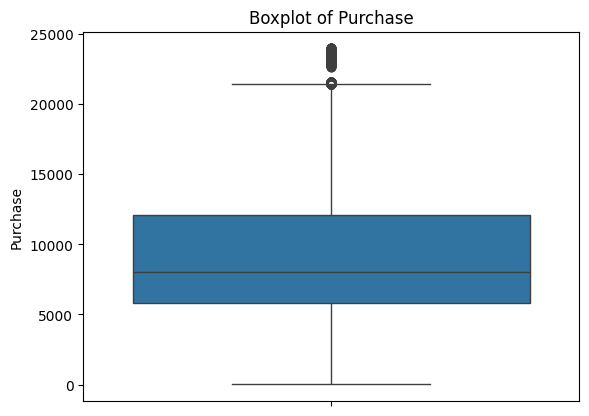

In [ ]:
sns.boxplot(data["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

In [ ]:
data["Purchase"].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.

### Gender

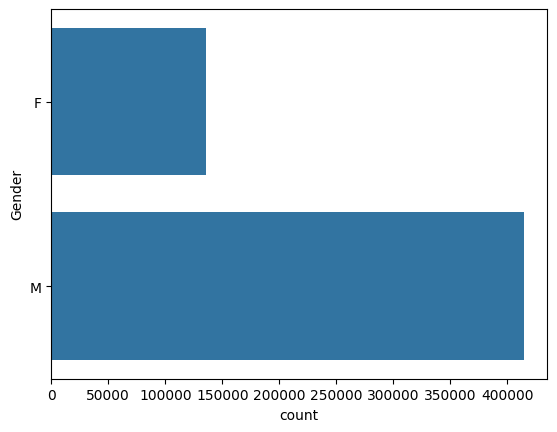

In [ ]:
sns.countplot(data['Gender'])
plt.show()

In [ ]:
data['Gender'].value_counts(normalize=True)*100

,proportion
Gender,
M,75.310507
F,24.689493


There are more males than females

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


<ipython-input-20-91ba400e4a28>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_purchase_by_gender, x="Gender", y="Purchase", palette=["blue", "pink"])


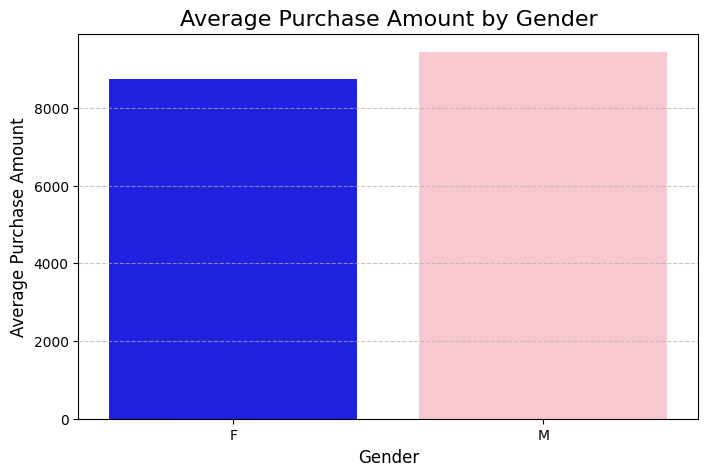

In [ ]:
# Group by Gender and compute the mean of Purchase
mean_purchase_by_gender = data.groupby("Gender")["Purchase"].mean()

print(mean_purchase_by_gender)
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Gender and compute mean Purchase
mean_purchase_by_gender = data.groupby("Gender")["Purchase"].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(data=mean_purchase_by_gender, x="Gender", y="Purchase", palette=["blue", "pink"])
plt.title("Average Purchase Amount by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Purchase Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



On average the male gender spends more money on purchase contrary to female, and it is possible to also observe this trend by adding the total value of purchase.

### Marital Status

In [ ]:
# Plotting the count of Marital_Status
sns.countplot(x=data['Marital_Status'])
plt.title("Count of Marital Status")
plt.show()


There are more unmarried people in the dataset who purchase more

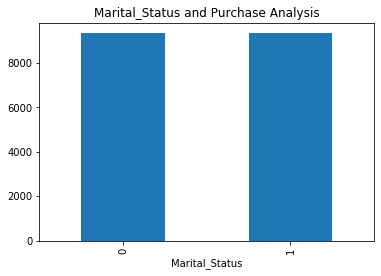

In [ ]:
data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.

### Occupation

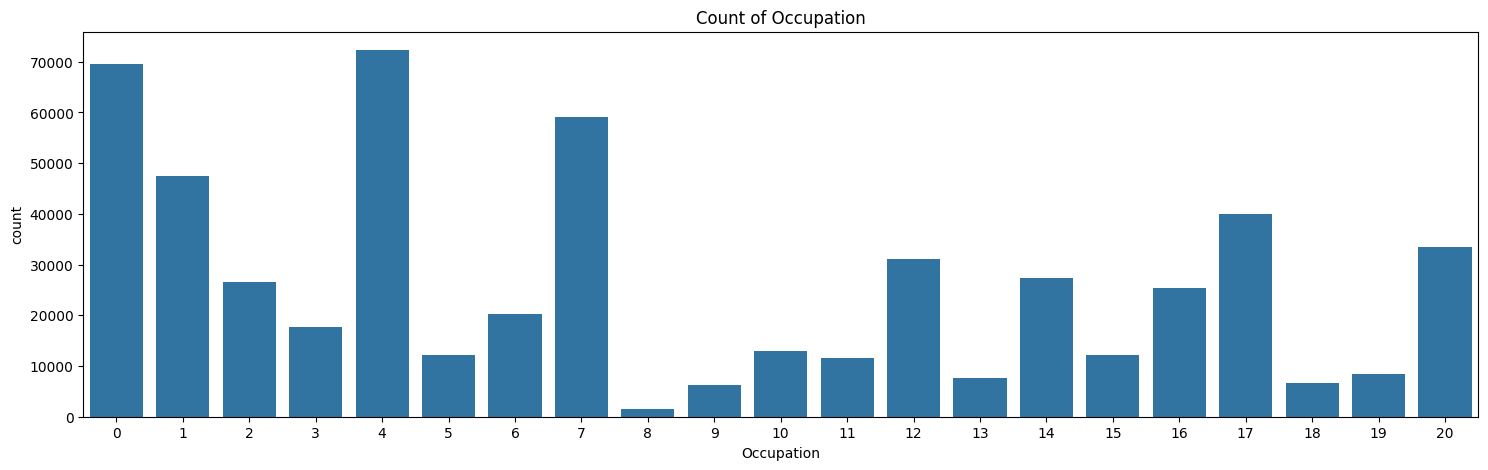

In [ ]:
# Set the figure size
plt.figure(figsize=(18, 5))

# Plot the count of 'Occupation'
sns.countplot(x=data['Occupation'])

# Show the plot
plt.title("Count of Occupation")
plt.show()


Occupation has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number

In [ ]:
occup = pd.DataFrame(data.groupby("Occupation").mean()["Purchase"])
occup

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


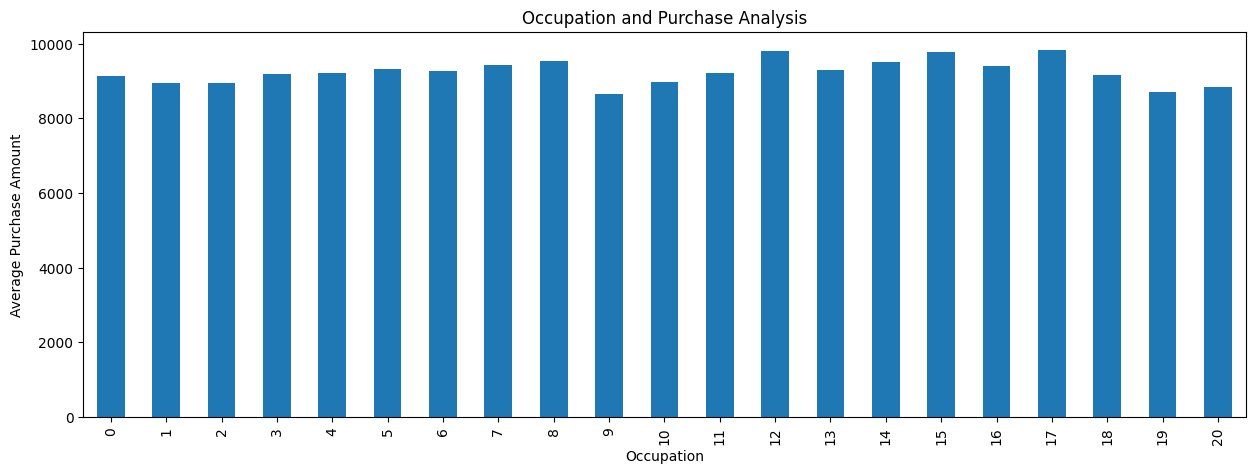

In [ ]:
import matplotlib.pyplot as plt

# Group by Occupation and calculate the mean of 'Purchase'
occupation_purchase = data.groupby('Occupation')['Purchase'].mean()

# Plotting the bar chart
occupation_purchase.plot(kind='bar', figsize=(15, 5))

# Adding title and showing the plot
plt.title("Occupation and Purchase Analysis")
plt.xlabel("Occupation")
plt.ylabel("Average Purchase Amount")
plt.show()


Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.

### City_Category

<ipython-input-11-e37e4d44a9fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['City_Category'], palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors


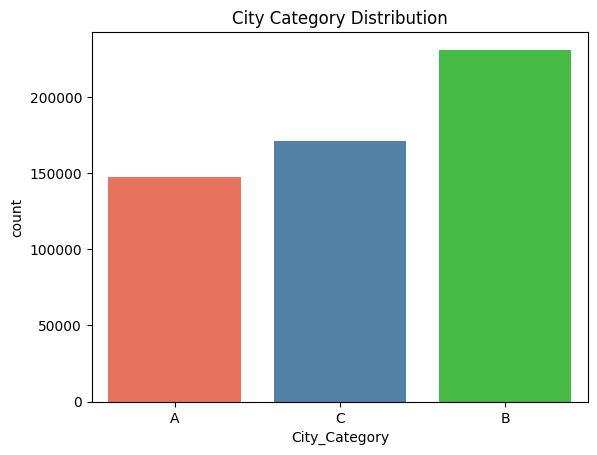

In [ ]:
# Plotting countplot with custom colors
sns.countplot(x=data['City_Category'], palette=['#FF6347', '#4682B4', '#32CD32'])  # Custom colors

plt.title("City Category Distribution")
plt.show()


It is observed that city category B has made the most number of puchases.

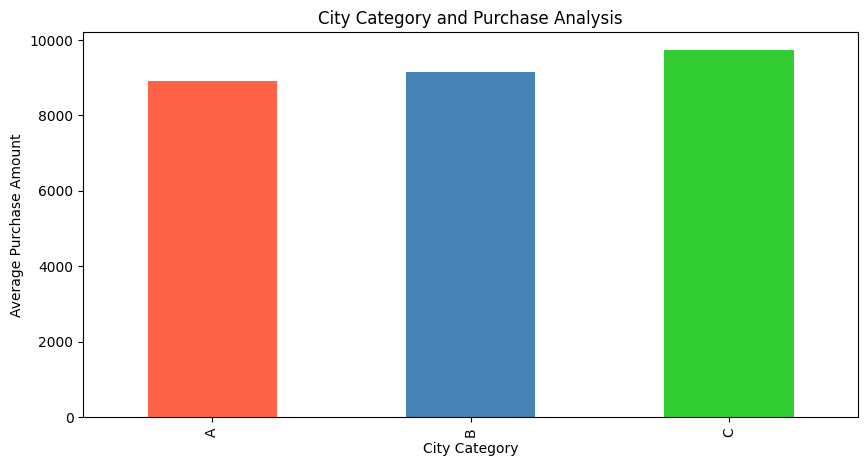

In [ ]:
import matplotlib.pyplot as plt

# Group by 'City_Category' and calculate the mean of 'Purchase'
city_purchase = data.groupby("City_Category")["Purchase"].mean()

# Plotting the bar chart with different colors for each bar
city_purchase.plot(kind='bar', figsize=(10, 5), color=['#FF6347', '#4682B4', '#32CD32'])

# Adding title and showing the plot
plt.title("City Category and Purchase Analysis")
plt.xlabel("City Category")
plt.ylabel("Average Purchase Amount")
plt.show()


However, the city whose buyers spend the most is city type ‘C’.

### Stay_In_Current_City_Years

<ipython-input-13-c570e804fafb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Stay_In_Current_City_Years'], palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'])


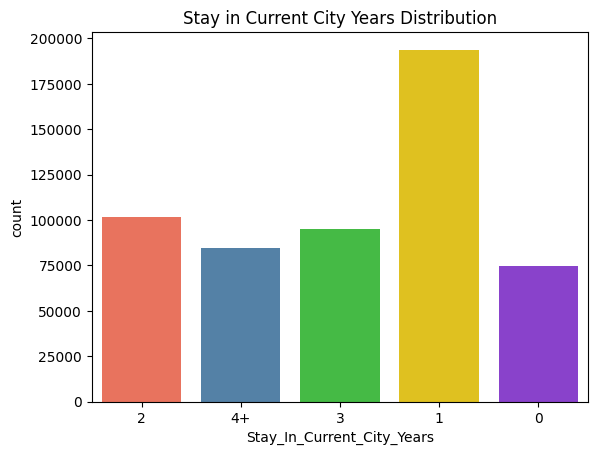

In [ ]:
# Custom colors for each bar
sns.countplot(x=data['Stay_In_Current_City_Years'], palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2'])

plt.title("Stay in Current City Years Distribution")
plt.show()


It looks like the longest someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.

We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

### Age

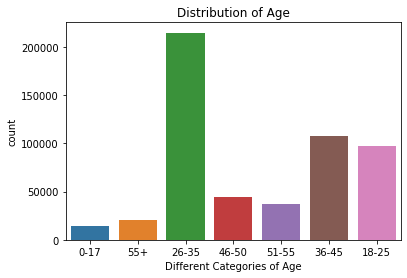

In [ ]:
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

Age 26-35 Age group makes the most no of purchases in the age group.

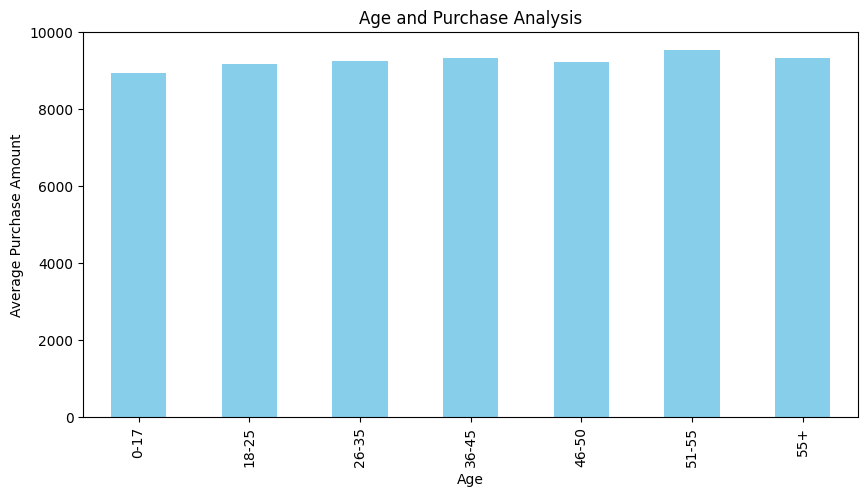

In [ ]:

# Group by 'Age' and calculate the mean of 'Purchase'
age_purchase = data.groupby("Age")["Purchase"].mean()

# Plotting the bar chart
age_purchase.plot(kind='bar', figsize=(10, 5), color='skyblue')

# Adding title and labels
plt.title("Age and Purchase Analysis")
plt.xlabel("Age")
plt.ylabel("Average Purchase Amount")
plt.show()


Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount

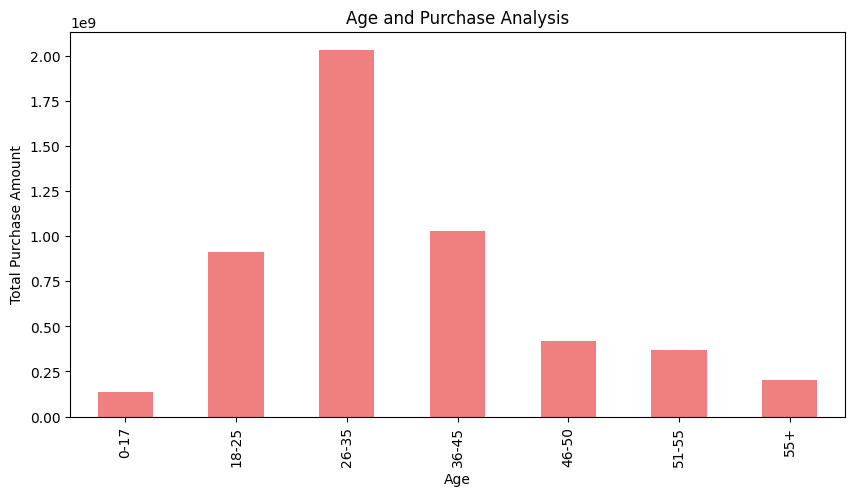

In [ ]:

# Group by 'Age' and calculate the sum of 'Purchase'
age_purchase_sum = data.groupby("Age")['Purchase'].sum()

# Plotting the bar chart
age_purchase_sum.plot(kind="bar", figsize=(10, 5), color='lightcoral')

# Adding title and labels
plt.title("Age and Purchase Analysis")
plt.xlabel("Age")
plt.ylabel("Total Purchase Amount")
plt.show()


Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.

### Product_Category_1

<ipython-input-21-1a2e2a025657>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Product_Category_1'], palette='coolwarm')  # You can change 'coolwarm' to any other palette


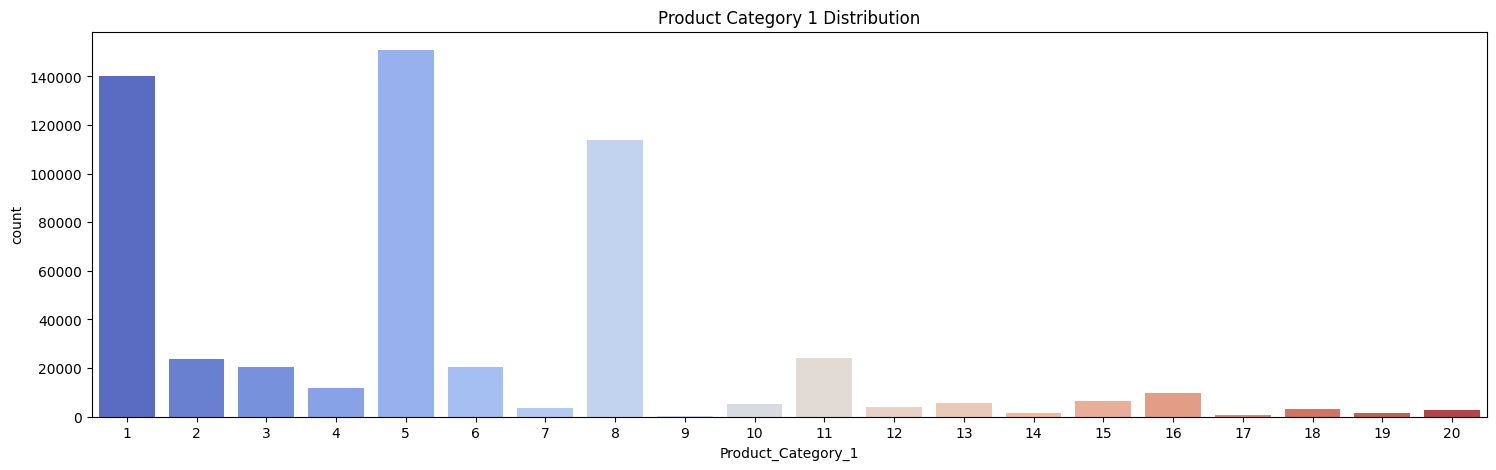

In [ ]:


# Set figure size
plt.figure(figsize=(18, 5))

# Plot the count of 'Product_Category_1' with a custom color
sns.countplot(x=data['Product_Category_1'], palette='coolwarm')  # You can change 'coolwarm' to any other palette

# Show the plot
plt.title("Product Category 1 Distribution")
plt.show()


It is clear that `Product_Category_1` numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.

<ipython-input-24-71c8fb53690c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category_1', y='Purchase', data=category_purchase_mean, palette='viridis')


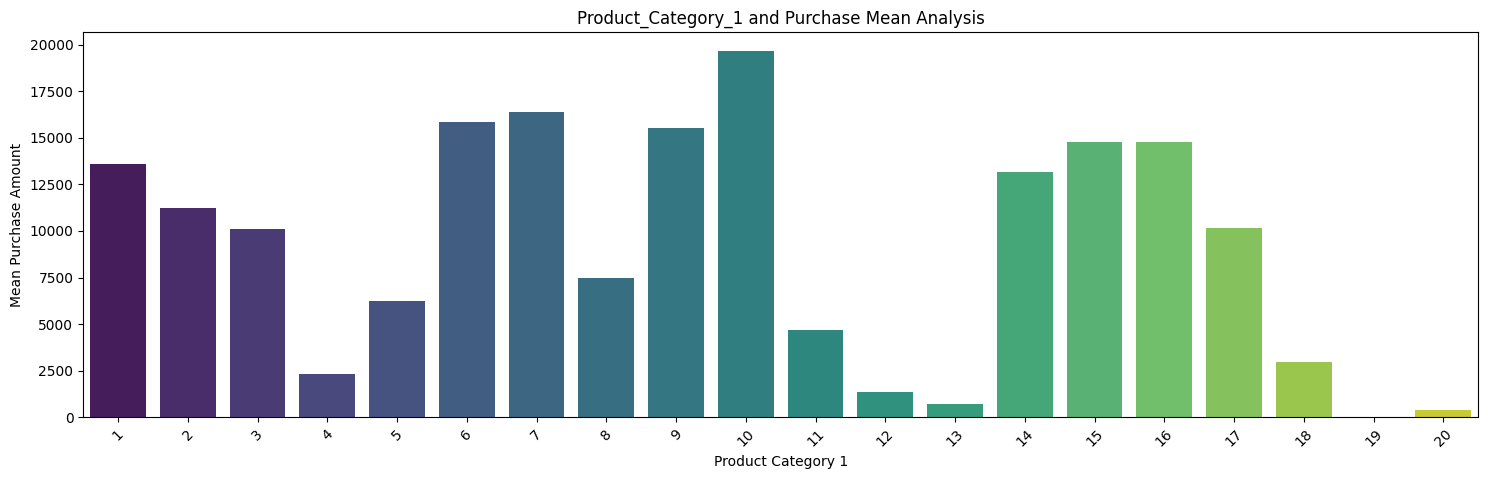

In [ ]:

# Group by 'Product_Category_1' and calculate the mean of 'Purchase'
category_purchase_mean = data.groupby('Product_Category_1')['Purchase'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(18, 5))

# Plotting the bar plot using seaborn
sns.barplot(x='Product_Category_1', y='Purchase', data=category_purchase_mean, palette='viridis')

# Adding title and labels
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Mean Purchase Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.

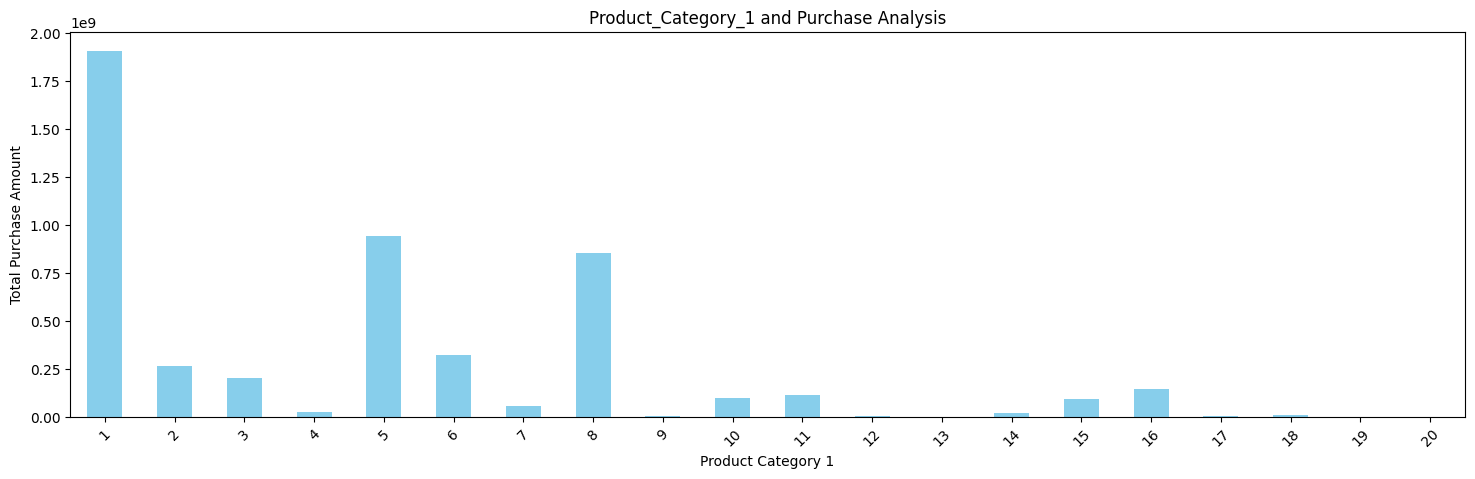

In [ ]:

# Group by 'Product_Category_1' and calculate the sum of 'Purchase'
category_purchase_sum = data.groupby('Product_Category_1')['Purchase'].sum()

# Plotting the bar chart with custom color
category_purchase_sum.plot(kind='bar', figsize=(18, 5), color='skyblue')

# Adding title and labels
plt.title("Product_Category_1 and Purchase Analysis")
plt.xlabel("Product Category 1")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.

### Product_Category_2

<ipython-input-27-3cf29345a4a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Product_Category_2'], palette=['#FF6347', '#4682B4', '#32CD32'])
<ipython-input-27-3cf29345a4a6>:2: UserWarning: 
The palette list has fewer values (3) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=data['Product_Category_2'], palette=['#FF6347', '#4682B4', '#32CD32'])


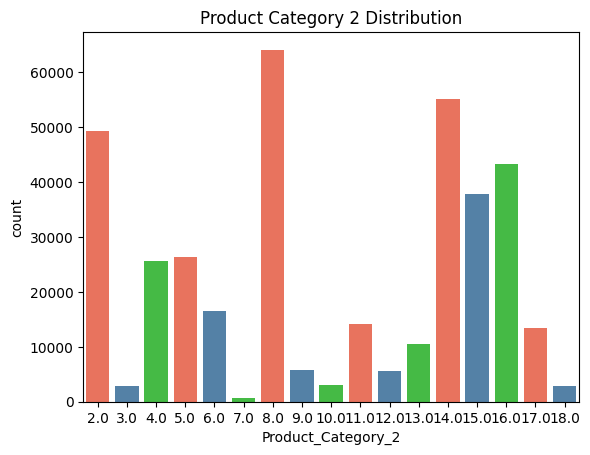

In [ ]:
# Plot with custom colors
sns.countplot(x=data['Product_Category_2'], palette=['#FF6347', '#4682B4', '#32CD32'])

# Show the plot
plt.title("Product Category 2 Distribution")
plt.show()


### Product_Category_3

<ipython-input-28-510594aea4d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Product_Category_3'], palette='Set1')  # Replace 'Set1' with any other palette


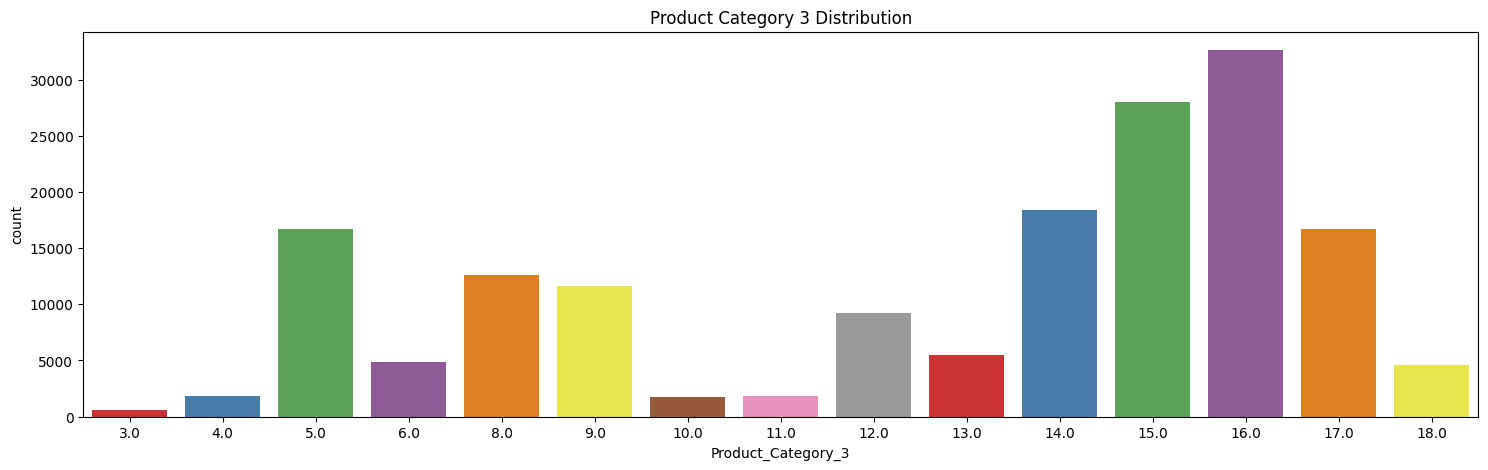

In [ ]:

# Set figure size
plt.figure(figsize=(18, 5))

# Plot the count of 'Product_Category_3' with a predefined color palette
sns.countplot(x=data['Product_Category_3'], palette='Set1')  # Replace 'Set1' with any other palette

# Show the plot
plt.title("Product Category 3 Distribution")
plt.show()


In [ ]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df = data.copy()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")

In [ ]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

## Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [ ]:
df['Age'] = lr.fit_transform(df['Age'])

In [ ]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


In [ ]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int64 
 3   Age                            550068 non-null  int64 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int64 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  bool  
 12  Stay_In_Current_City_Years_1   550068 non-nu

## Dropping the irrelevant columns

In [ ]:
df = df.drop(["User_ID","Product_ID"],axis=1)

## Splitting data into independent and dependent variables

In [ ]:
X = df.drop("Purchase",axis=1)

In [ ]:
y=df['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Modeling

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

9536.400764131593

In [ ]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

3532.069226165843

In [ ]:
mean_squared_error(y_test, y_pred)

21397853.26940751

In [ ]:
r2_score(y_test, y_pred)

0.15192944521481688

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


# DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
dt_y_pred = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, dt_y_pred)

2372.0357559134654

In [ ]:
mean_squared_error(y_test, dt_y_pred)

11300579.466797074

In [ ]:
r2_score(y_test, dt_y_pred)

0.5521191505924365

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  3361.633452177241


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RFregressor = RandomForestRegressor(random_state = 0)

In [ ]:
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
rf_y_pred = RFregressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test, rf_y_pred)

2222.049109204734

In [ ]:
mean_squared_error(y_test, rf_y_pred)

9310769.87311957

In [ ]:
r2_score(y_test, rf_y_pred)

0.6309821516972987

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  3051.35541573242


# XGBoost Regressor



In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

C:\Users\Nantha\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:14:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=1.0, max_delta_step=0,
             max_depth=6, min_child_weight=40, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=None,
             subsample=1, verbosity=1)

In [ ]:
xgb_y_pred = xgb_reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test, xgb_y_pred)

2154.954637289423

In [ ]:
mean_squared_error(y_test, xgb_y_pred)

8290522.888761112

In [ ]:
r2_score(y_test, xgb_y_pred)

0.664869986978737

In [ ]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2879.326811732408


The ML algorithm that perform the best was XGBoost Regressor Model with RMSE = 2879